## Linear Regression for Machine Learning --> To predict the target variables

Data source --> https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [2]:
# Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns
import re
%matplotlib inline

In [3]:
# Lets load the dataset and get hands dirty
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('../data/housing.csv', sep=r'\s+', header=None, names=columns, engine='python')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Dataset Content and Column explation
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

In [4]:
# Basic cleaning and dtype fixes
# Convert CHAS to categorical (0/1), RAD to int, ensure numeric types

df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] = df['RAD'].astype(int)
# Coerce all columns to numeric if any stray characters exist
for col in df.columns:
    if df[col].dtype == object:
        # strip non-numeric except . and - using regex
        df[col] = df[col].str.replace(r'[^0-9\.-]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Quick sanity checks
print(df.dtypes)
df.describe(include='all').T.head(10)
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#check the missing values
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
#check the duplicates
df.duplicated().sum()


np.int64(0)

In [11]:
#check the outliers
df.describe(include='all').T.head(10)


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
# getting all the target variables 
# In a typical regression problem, the target variable is the one we want to predict.
# Let's check which columns could be possible target variables by looking for columns that are not features or are commonly used as targets.

# Print all column names
print("All columns in the dataset:")
print(df.columns.tolist())

# Check for columns that could be target variables
# In the Boston Housing dataset, 'MEDV' (Median value of owner-occupied homes) is the usual target.
# But let's check for columns that are not likely to be features (e.g., not IDs, not categorical codes, etc.)
possible_targets = []
for col in df.columns:
    # Heuristic: If the column is not binary/categorical and is not an obvious feature, consider as possible target
    unique_vals = df[col].nunique()
    if unique_vals > 10 and col not in ['CHAS', 'RAD']:  # CHAS and RAD are categorical
        possible_targets.append(col)

print("\n\nPossible target variables based on number of unique values and context:")
print(possible_targets)


All columns in the dataset:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


Possible target variables based on number of unique values and context:
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


## In any regression problem, you should always run the correlation matrix to understand the relationship between the features and the target variable.
## #Also check for multicollinearity if the features are highly correlated with each other. and then you can drop the highly correlated features, and keep either one of them.


In [13]:
# Exploratory Data Analysis
#Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


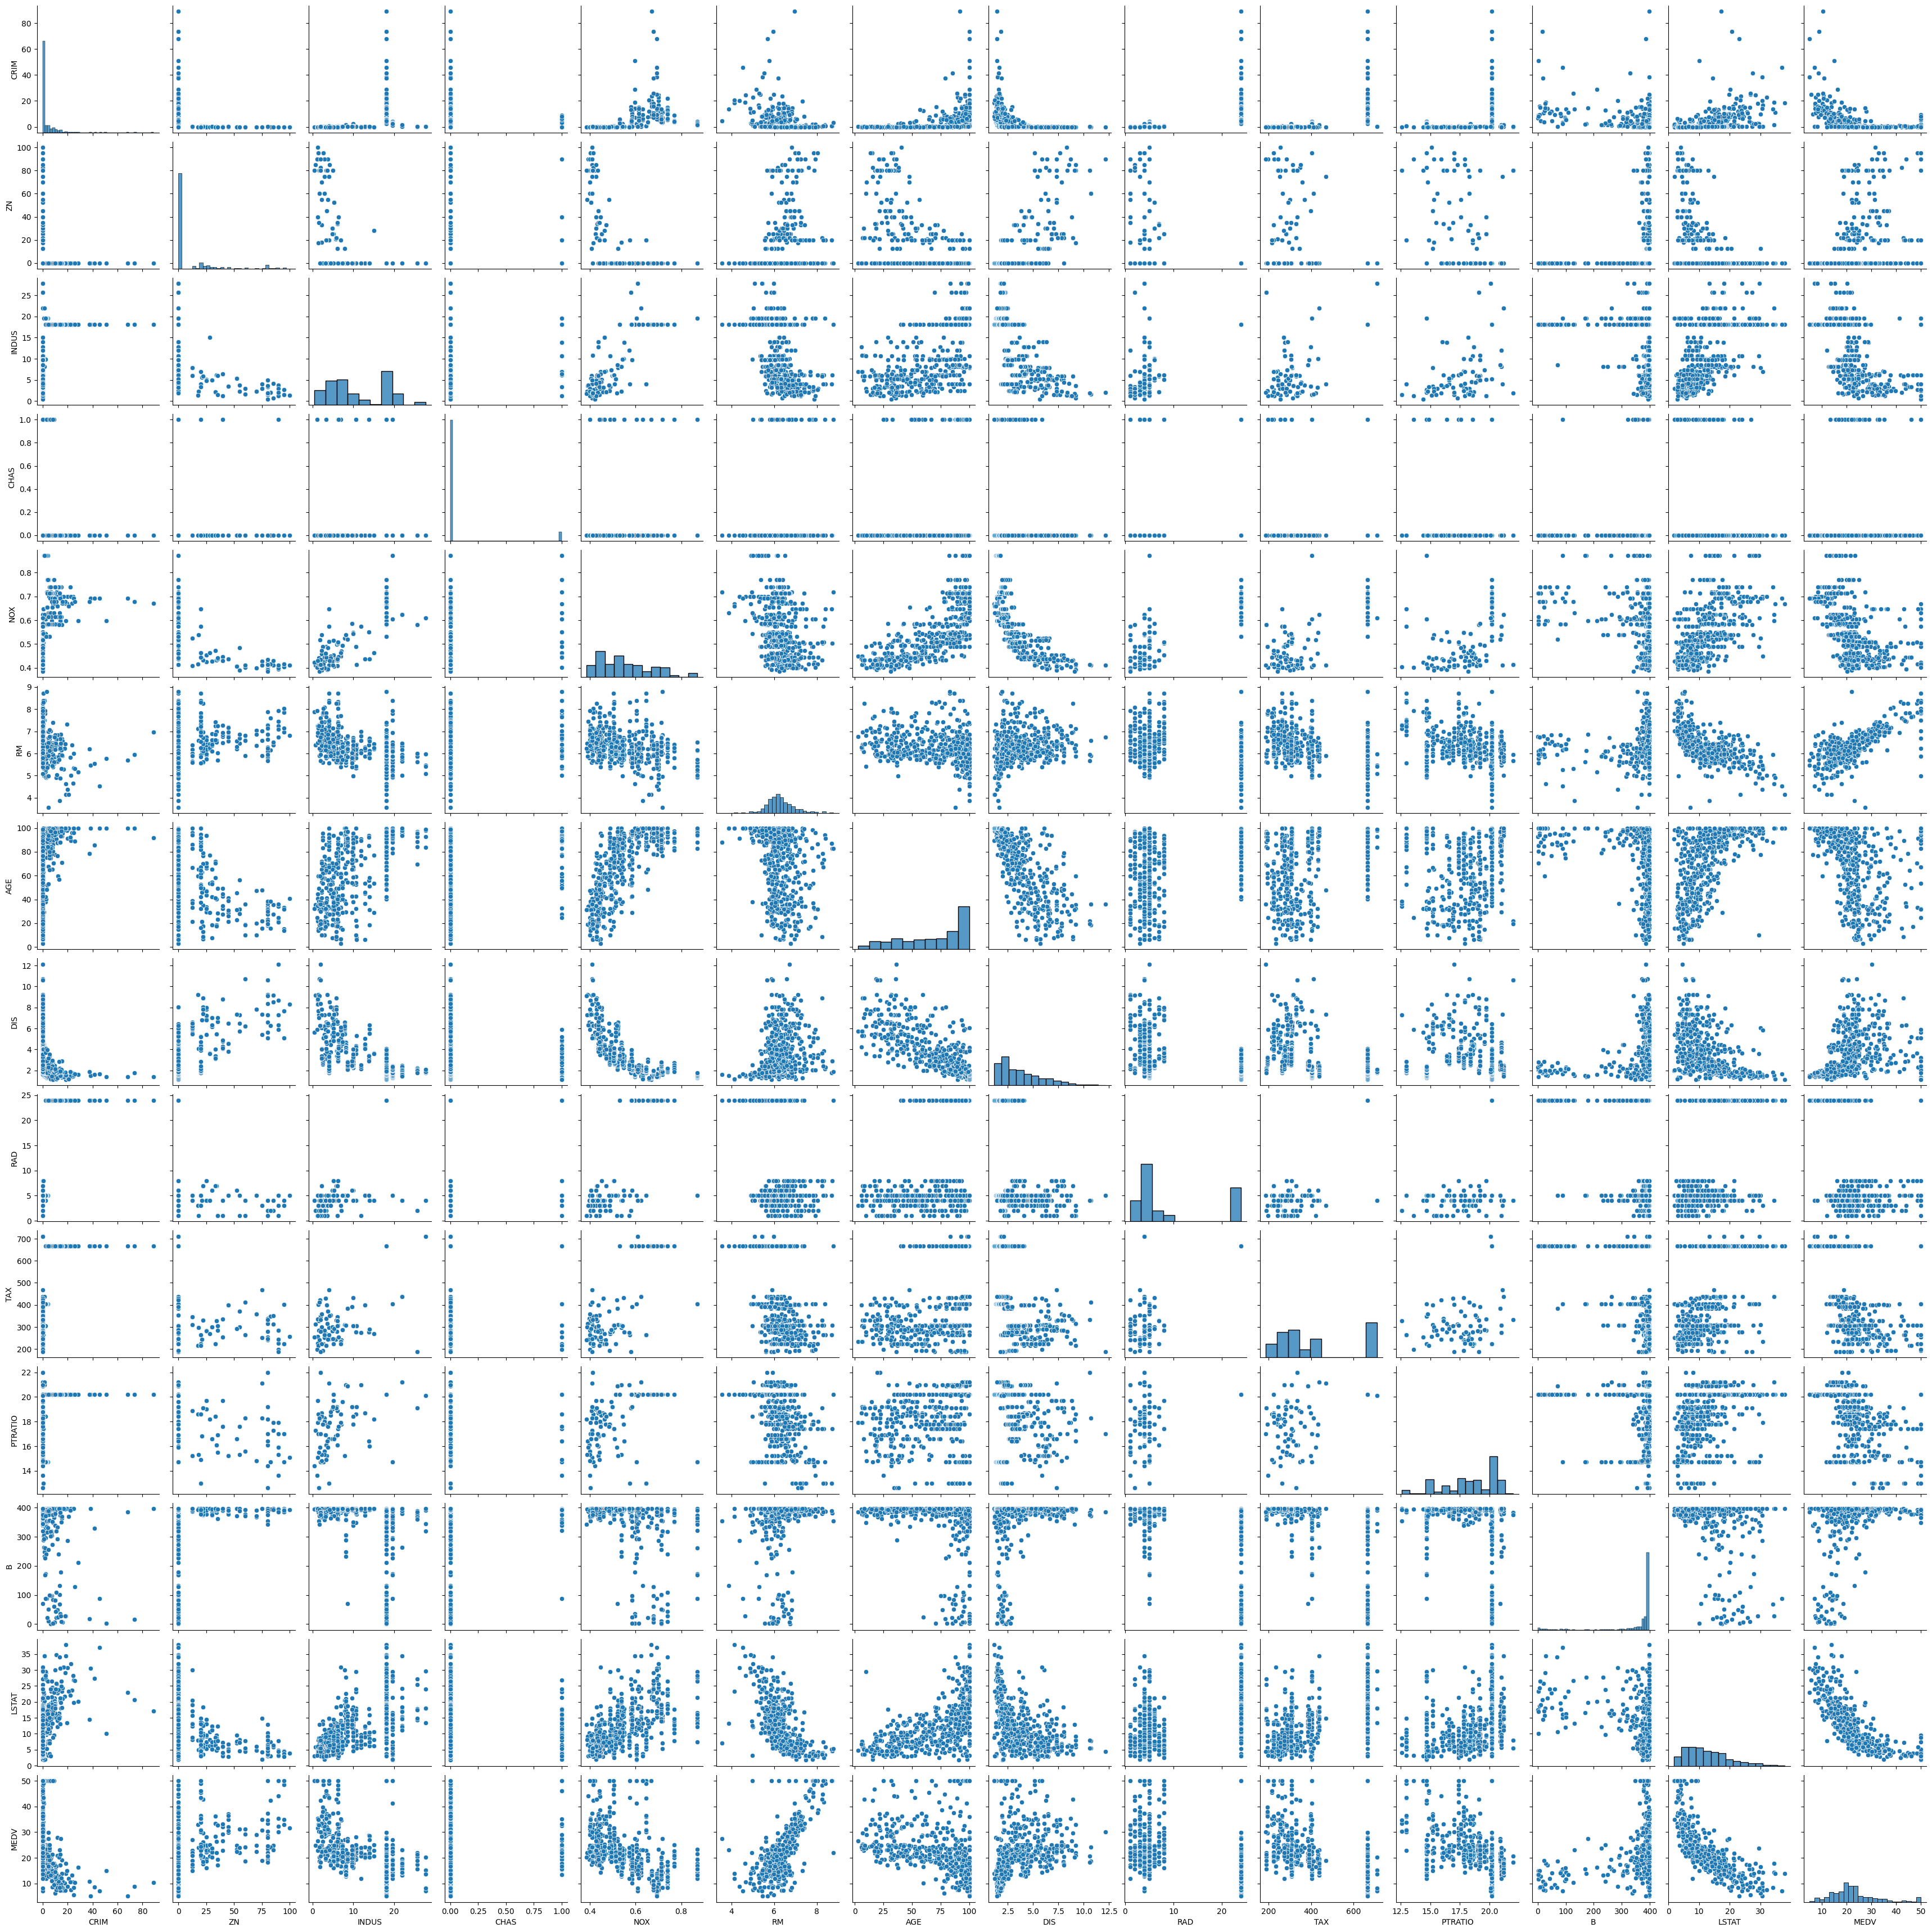

In [14]:
## Let's plot some charts and we'll see how the correlation looks line in charts like heatmap, scatter plot, box etc. 

import seaborn as sns
sns.pairplot(df)


## Analysis of the above pairplot graph

The pairplot above provides a comprehensive visualization of the relationships between all pairs of features in the dataset.
Here are some key points to analyze and comment on:

#### 1. **Correlation with Target (MEDV):**
    - Look for features that show a strong linear relationship with 'MEDV' (the target variable).
    - For example, 'RM' (average number of rooms per dwelling) appears to have a strong positive correlation with 'MEDV'.
    - 'LSTAT' (% lower status of the population) shows a strong negative correlation with 'MEDV'.
    - 'PTRATIO' and 'NOX' also show some negative correlation with 'MEDV'.

#### 2. **Feature Distributions:**
    - The diagonal plots show the distribution of each feature.
    - Some features like 'CHAS' and 'RAD' are categorical/discrete, while others are continuous.
    - Features like 'CRIM' and 'B' are highly skewed.

#### 3. **Multicollinearity:**
    - Look for pairs of features that are highly correlated with each other (e.g., 'TAX' and 'RAD', 'NOX' and 'INDUS').
    - High correlation between features can lead to multicollinearity, which may affect regression models.
    - Consider dropping or combining highly correlated features.

#### 4. **Outliers:**
    - Some scatter plots show points that are far from the general trend, indicating possible outliers (e.g., high 'CRIM' values).

#### 5. **Non-linear Relationships:**
    - Some relationships may not be strictly linear (e.g., 'LSTAT' vs 'MEDV' may show a curve).
    - Consider polynomial or non-linear models if needed.

#### 6. **Next Steps:**
    - Based on these observations, you can select the most relevant features for modeling.
    - You may also consider transforming skewed features or handling outliers.

### In summary, the pairplot is a powerful tool for initial EDA, helping to identify important features, potential issues with multicollinearity, and the nature of relationships in the data.


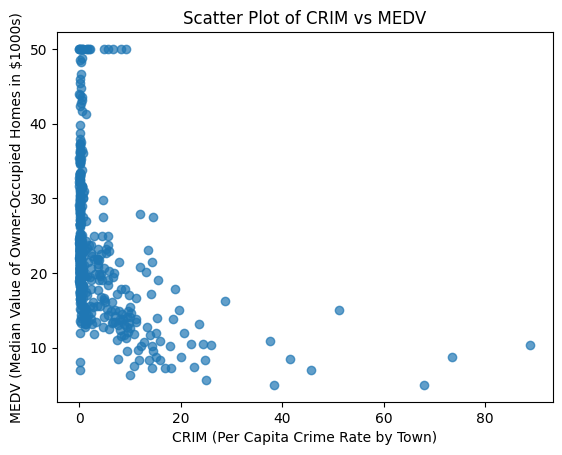

In [15]:
#scatter plot
import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 6))
plt.scatter(df['CRIM'], df['MEDV'], alpha=0.7)
plt.xlabel('CRIM (Per Capita Crime Rate by Town)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes in $1000s)')
plt.title('Scatter Plot of CRIM vs MEDV')
#plt.grid(True)
plt.show()


As we clearly see the co-relation between the CRIM rate and the house prices are negatively correlated, as the CRIM rate goes up the house prices are likely go down. 

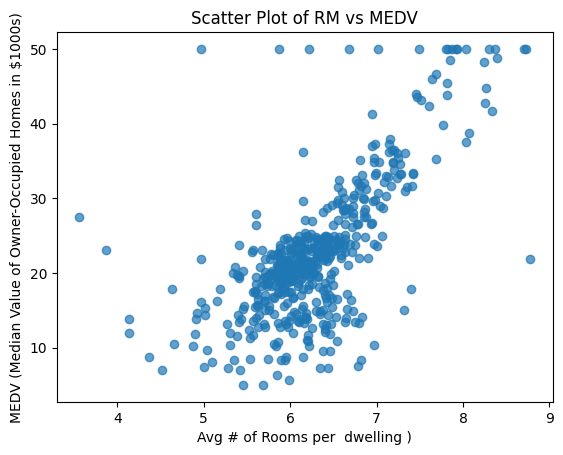

In [16]:
# Now let's plot the realtion between RM and prices
plt.scatter(df['RM'], df['MEDV'], alpha=0.7)
plt.xlabel('Avg # of Rooms per  dwelling )')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes in $1000s)')
plt.title('Scatter Plot of RM vs MEDV')
#plt.grid(True)
plt.show()

As we can see the RM and the MEDV features are posssitively correlated to each other as the number of room increase in house the Price of that house will be higher

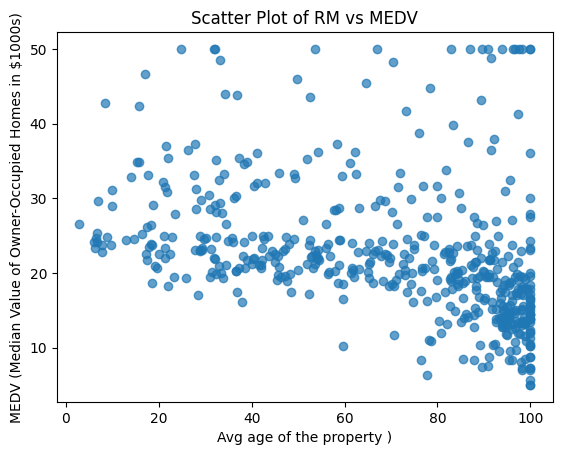

In [17]:
# Lets Plot the one more feature as AGE vs Price
# Now let's plot the realtion between RM and prices
plt.scatter(df['AGE'], df['MEDV'], alpha=0.7)
plt.xlabel('Avg age of the property )')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes in $1000s)')
plt.title('Scatter Plot of RM vs MEDV')
#plt.grid(True)
plt.show()

Clearly the AGE of the House (How old is property) is also an key factor deciding the house prices, as its negatively correlated house prices are most likely to go down as the age of the property increases. 

<Axes: xlabel='RM', ylabel='MEDV'>

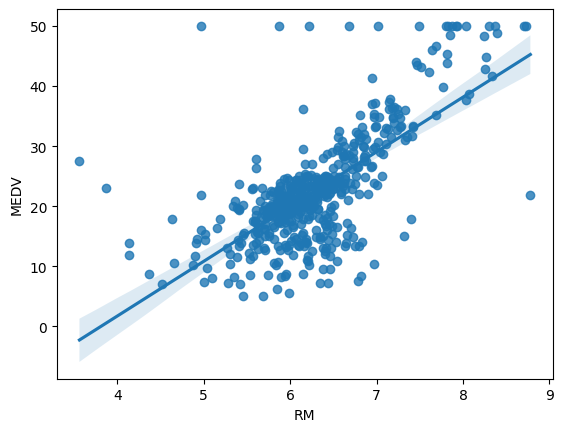

In [18]:
# Now Let's plot the regression plot with seaborn 

sns.regplot(x="RM",y="MEDV",data=df)


As we clearly see the regression plot is linear with RM and MEDV features and there is some sort of variance is there, there will be always some variabce there.

<Axes: xlabel='LSTAT', ylabel='MEDV'>

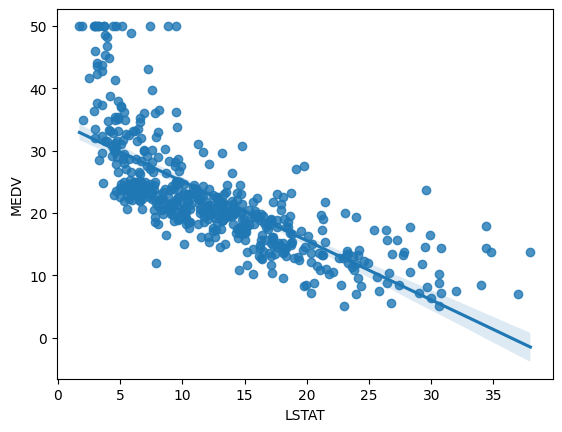

In [19]:
from seaborn import regression
sns.regplot(x="LSTAT",y="MEDV",data=df)

This is Negaticely correlated plot with respect the prices and the LSTAT(% lower population in that area) features

<Axes: xlabel='CHAS', ylabel='MEDV'>

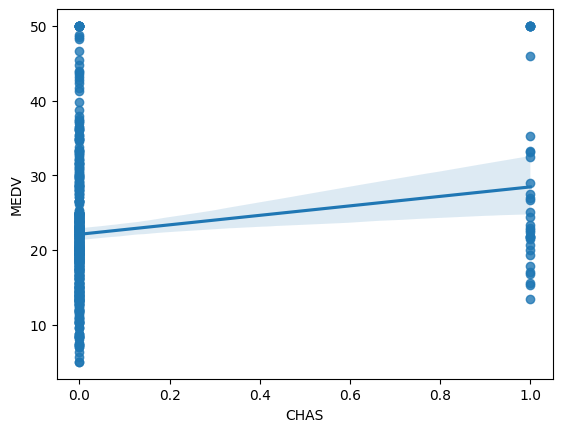

In [20]:
# regression with CHAS and PTRatio
sns.regplot(x="CHAS",y="MEDV",data=df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

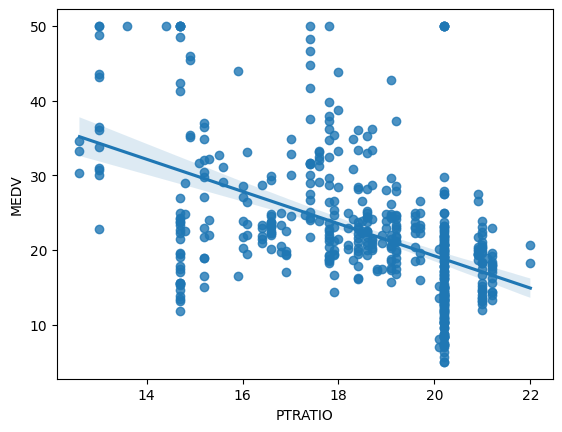

In [21]:
sns.regplot(x="PTRATIO",y="MEDV",data=df)

As you can clearly see from the above CHAS vs Price plot, its giving us the indication that its no correlated with respect to price and in PTRAIO vs Price is negatively correlated which refers to as prices go higher PTRAION goes down and vice-versa. 

## Independent and Dependent Features
- Here we'll divide the independent and dependent variables in different dataframe

In [22]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
X=df.iloc[:,:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [24]:
y=df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

##  Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [26]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1,0.8710,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0,0.5810,5.613,95.6,1.7572,2,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0,0.4600,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [27]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81
322,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287.0,19.6,396.90,7.70


In [28]:
y_train

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 379, dtype: float64

Ok looks perfect! Lets work on Train dataset for now and we won't be using a test dataset now only once the model is ready then we'll see the test dataset

# Standardize dataset or Normalizing the dataset 
- Because everything should be in same scale and for that we need to standardize the dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
X_train

array([[-0.40679535, -0.50281197, -1.24707626, ..., -0.20515671,
         0.40451209, -1.07775629],
       [ 0.00799171, -0.50281197,  1.21828293, ..., -1.57625236,
        -3.09803734,  0.35116456],
       [-0.41344957,  0.36438137, -1.12179223, ..., -1.48779457,
         0.32659121, -1.22625199],
       ...,
       [-0.41595107,  2.96596138, -1.31187834, ..., -0.55898784,
         0.36812613, -0.91385066],
       [ 0.92638065, -0.50281197,  1.00515608, ...,  0.8563367 ,
        -2.84814129,  1.50690937],
       [-0.39020739, -0.50281197, -0.36864804, ...,  1.16593894,
        -3.29495634, -0.26383177]], shape=(379, 13))

In [31]:
X_train

array([[-0.40679535, -0.50281197, -1.24707626, ..., -0.20515671,
         0.40451209, -1.07775629],
       [ 0.00799171, -0.50281197,  1.21828293, ..., -1.57625236,
        -3.09803734,  0.35116456],
       [-0.41344957,  0.36438137, -1.12179223, ..., -1.48779457,
         0.32659121, -1.22625199],
       ...,
       [-0.41595107,  2.96596138, -1.31187834, ..., -0.55898784,
         0.36812613, -0.91385066],
       [ 0.92638065, -0.50281197,  1.00515608, ...,  0.8563367 ,
        -2.84814129,  1.50690937],
       [-0.39020739, -0.50281197, -0.36864804, ...,  1.16593894,
        -3.29495634, -0.26383177]], shape=(379, 13))

now everything looks on same scale and we have also applied the same to X train and X test as well but if you noticed we haven't applied fit_transform to X_test only for X_train and thats because we have to make sure that whatver steps and ttechniques we have applied ot used for traininng dataset the same should be applied to X_test dataset as well without lwtting the model know much about the Training dataset. 

# Model Training

In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Let's see the Coefficients and intercept as well
print(regression.coef_)

[-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236]


In [34]:
print(regression.intercept_)

22.90791556728232


### Now, if you really want to see on which parameters the model is trained on

In [35]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

## Prediction with Test data 

In [36]:
reg_pred=regression.predict(X_test)
reg_pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

## Assumptions:

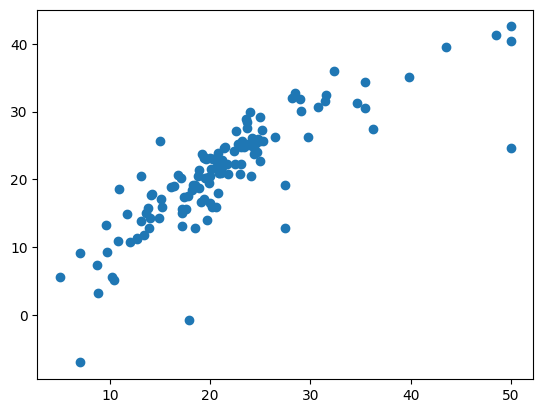

In [37]:
# Plot a scatter plot for prediction
plt.scatter(y_test,reg_pred)

## Now Lets focus on the scatter plot --> 
# if you see the linear relation between the y_test(true value of testing dataset) and reg_pred(predicted values of model) ,  
# that means the model is giving related linear prediction or you can also say close or similar to actual values.

In [38]:
## Residuals --> means errors --> Let's see the residuals between the y_test and reg_pred and it will show us the lesswer the residual closer the predicted values with respect to actual values
residuals = y_test - reg_pred
residuals

173   -5.238854
274   -3.607833
491   -1.483248
72    -2.430909
452   -2.778641
         ...   
418    5.515791
117   -4.598796
42    -0.433299
322   -2.648156
347   -1.630468
Name: MEDV, Length: 127, dtype: float64

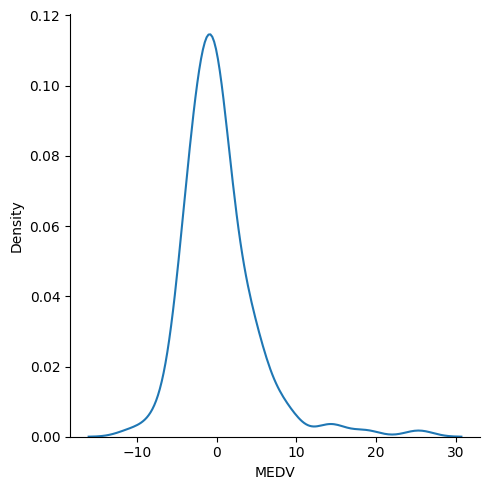

In [39]:
# Plot the residual
sns.displot(residuals,kind="kde")

## Here your residual should looks like an normal distribution and almost and most of the values are in between -10 to +10 range 
# and few values are in +10 to 30 range as well. 

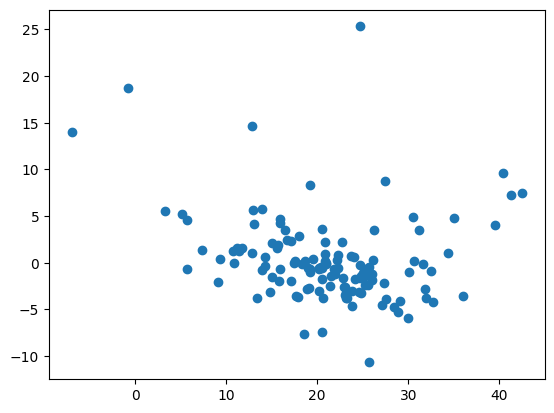

In [40]:
#Sctter plot with respect to predictions and the residuals 
 # it shows uniform distribution
plt.scatter(reg_pred,residuals)

## Model Evaluation - performance 

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


3.0609395954370306
22.09869482709797
4.700924890603759


## R square & Adjusted R Square

#### Formula's 
## R Square
### R^2 = 1 - SSR/SST
R^2 = coefficient of determination; Sum of Squares of Residual; SST = Total sum of square

## Adjusted R Square
### Adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]
R^2= R Square of the model;  n = number of observations; k = number of predictor variables 

In [42]:

from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6844267283527133


In [43]:
# display adjustd R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.648121838694176

# New Data Prediction 

In [51]:
#X_test[0].shape
X_test[0].reshape(1,-1)

array([[-0.40670502, -0.50281197, -1.0181089 , -0.28784917, -0.40623863,
         0.12863217,  0.54046333, -0.52948929, -0.50774088, -0.65913246,
        -0.73590341,  0.42030222, -0.48657531]])

In [52]:
## transformation of new data same as we did it for training thw model i.e. standardization
scaler.transform(X_test[0].reshape(1,-1))

c:\z_DRIVEs\ML_MLOps_Projects_2025\house_price_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.46674171, -0.52461373, -1.74794002, -1.37070631, -8.10827398,
        -8.61432101, -2.47977067, -2.03471392, -1.14892386, -2.44794645,
        -8.4033814 , -4.10024976, -1.82115591]])

In [53]:
## Now lets predict new data
regression.predict(scaler.transform(X_test[0].reshape(1,-1)))


c:\z_DRIVEs\ML_MLOps_Projects_2025\house_price_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([37.73363277])

# Prepare Pickle file for Model Deployemnt

In [58]:
import pickle

In [ ]:
## To save the .pkl in same folder as you current file is then 
#pickle.dump(regression, open('regmodel.pkl', 'wb'))


In [62]:

# If you want to store the .pkl file in a specific folder, provide the full path to the file.
# For example, to save it in a folder named 'models', use:
import os, pickle
os.makedirs("../models", exist_ok=True)
pickle.dump(regression, open("../models/regmodel.pkl","wb"))
# Make sure the 'models' folder exists before running this line, otherwise you'll get a FileNotFoundError.

In [64]:
## Pickling the prediction model 
pickled_model=pickle.load(open("../models/regmodel.pkl","rb"))


In [65]:
pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

c:\z_DRIVEs\ML_MLOps_Projects_2025\house_price_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([37.73363277])

As you can see the same prediction as we get from the regression.predict()